In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re

warnings.filterwarnings('ignore')
%matplotlib inline

In [53]:
# 데이터 로드
df1 = pd.read_csv("../../4.데이터/경돼님_댓글.csv")
df2 = pd.read_csv("../../4.데이터/경돼님_채널정보.csv")

In [54]:
# 데이터 병합
df = pd.merge(df2, df1, on = "video_id")

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598 entries, 0 to 597
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   video_id       598 non-null    object 
 1   title          598 non-null    object 
 2   published_at   598 non-null    object 
 3   description    596 non-null    object 
 4   tags           591 non-null    object 
 5   duration       598 non-null    object 
 6   view_count     598 non-null    int64  
 7   likes          597 non-null    float64
 8   dislikes       597 non-null    float64
 9   comment_count  597 non-null    float64
 10  comments       598 non-null    object 
dtypes: float64(3), int64(1), object(7)
memory usage: 56.1+ KB


In [56]:
df.head(10)

,video_id,title,published_at,description,tags,duration,view_count,likes,dislikes,comment_count,comments
0,gBx2UrI4JqE,100kg 20회 실화?!?? 아이템 착용,2021-05-31T12:40:46Z,아이템전....,"벤치프레스,스트렝스,경돼 벤치프레스,100kg,벤치프레스100kg,benchpres...",PT37S,973,25.0,2.0,12.0,"['형님영상보고 5X5X5 루틴하고있는데\n5,5,5가 효과가 더있나요 아니면 많이..."
1,n2jAepfvF6c,"벤치 120kg, 도와ㅜ줘 도와ㅜ줘!!",2021-05-30T22:29:56Z,출근 전 벤치프레스,"벤치프레스,Benchpress,스트렝스,경돼",PT43S,1487,33.0,0.0,21.0,['손바닥 전체적으로 미시나요?\n자신만의 포인트좀 공유부탁드려요.\n 상당히 안정...
2,_thZKDd0NGo,출근 전 벤치프레스 100kg,2021-05-26T22:34:52Z,NaN,"shorts,short,벤치프레스,직장인",PT42S,2042,31.0,3.0,17.0,"[""'진짜 운동하는 직장인'"", '쌀돼 경돼 갓돼', '요새는 유도 안하세요??',..."
3,UURowG79j8c,궁금했던 것 물어보면 딱 좋은 타이밍!,2021-05-14T02:32:46Z,여러분 안녕하세요 경돼입니다.\r\n\r\n모두\r\n\r\nBe more posi...,"경돼,스트렝스,훈련,운동vlog,운동유튜버,워라밸,마왕,마선호,경돼 마선호,브이로그",PT3M30S,2011,67.0,2.0,16.0,"['진짜 멋있다 ㅎㅎ', '도대체이형은 몸이 왜 변하지않는거지', '경돼 가슴이 진..."
4,0Cn9Jk0BrdE,비아냥 속에서도 묵묵히 최선을 다할 것.,2021-04-25T02:51:34Z,벚꽃슈레딩 Day25,"shorts,짧은동영상,경돼,다이어트",PT13S,5501,127.0,7.0,64.0,['비아냥이라니요. 지금도\n잘 하시고 있는데.. 누구 탓할\n필요도 없습니다. 본...
5,QXpJ7WOF4Zo,"78kg, 썸머슈레딩(다이어트) 시작, 이건 못참지",2021-03-13T10:49:13Z,또머슈레딩\r\n#썸머슈레딩 #다이어트 #직장인,"다이어트,썸머슈레딩,경돼,운동유튜버,shorts,짧은동영상",PT31S,4459,101.0,1.0,53.0,"['와 몸 미쳤어요', '무한동력 왜 연구함\n경돼의 무한슈레딩이 있는데 ㅋㅋ', ..."
6,w2eBt4FhFVQ,아침 저녁으로 운동하기!,2021-03-07T08:59:56Z,"여러분 안녕하세요 경돼입니다.\r\n\r\n이제 운동을, 하루에 2번씩 넣어주고 있...","경돼,스트렝스,훈련,운동vlog,운동유튜버,워라밸,경돼운동,브이로그",PT6M59S,2817,74.0,2.0,41.0,"['와 몸 또 만들었네요.. 대박~ 멋있어요', '경돼님 어떻게 운동을 2번이나....."
7,66z8rKLa-3Q,"(경돼 유도) 주말에 유도 한판, 청림유도관",2021-03-07T07:37:24Z,주말 유도,"유도,경돼유도,일반인 유도,청림유도관,judo",PT1M24S,2115,42.0,0.0,16.0,['이런 기술은 얼마나 익혀야\n제대로 나올까요? 유단자시니까\n잘 하시는것 같아요...
8,JeEU0qeb-0w,출퇴근 길은 헬스장으로,2021-03-01T13:48:44Z,여러분 안녕하세요 경돼입니다.\r\n\r\n\r\n\r\n--------------...,"경돼,스트렝스,훈련,운동vlog,운동유튜버,워라밸,경돼운동,집,집회사,회사,헬스장,...",PT8M48S,3587,89.0,1.0,43.0,"['저 니랩??은 혹시 어디껀지 알 수 있을까요?', '운동 좋아하는 취준생인데 보..."
9,RodnFgR1vmg,천천히 운동 쌓아 나가기│브이로그,2021-02-21T13:30:02Z,여러분 안녕하세요 경돼입니다.\r\n\r\n\r\n\r\n--------------...,"경돼,스트렝스,훈련,운동vlog,운동유튜버,워라밸,경돼운동,스쿼트,운동 브이로그,스...",PT10M,3602,91.0,3.0,37.0,"['아저씨 다됐네....', '돌아와서 기쁩니다💪💪💪💪', '경돼형님 벌써 4년가까..."


In [57]:
# 업로드 시간의 영향력을 파악하기 위해 추출
def publish_time(x):
    a = x.split("-")[2][3:5]
    return a

df["published_time"] = df["published_at"].apply(lambda x: publish_time(x))

def date_split(x):
    lst = x.split("-")
    lst[2] = lst[2][:2]
    a = "-".join(lst)
    return a

# 날짜 필요한 부분만 슬라이싱
df["published_at"] = df["published_at"].apply(lambda x: date_split(x))

# 연도 
df["published_year"] = df["published_at"].apply(lambda x: x.split("-")[0])
df["published_month"] = df["published_at"].apply(lambda x: x.split("-")[1])
df["published_day"] = df["published_at"].apply(lambda x: x.split("-")[2])

In [76]:
df["published_at"][0].split("-")

['2021', '05', '31']

In [60]:
df["duration"].head()

0      PT37S
1      PT43S
2      PT42S
3    PT3M30S
4      PT13S
Name: duration, dtype: object

In [61]:
# 영상길이를 초로 전환
def preprocessing_duration(x):
    # 정규표현식으로 분, 초 추출
    minute = re.findall("[0-9]{1,}M", x)
    second = re.findall("[0-9]{1,}S", x)

    if second:
        second = int(second[0][:-1])
    else:
        second = 0
        
    if minute:
        minute = int(minute[0][:-1]) * 60
    else:
        minute = 0
        
    result = minute + second
    return result

df["duration"] = df["duration"].apply(lambda x: preprocessing_duration(x))

In [63]:
# df 순서 정리
pre_df = df[["title", "published_at", "published_time", 
   "published_year", "published_month", "published_day",
  "duration", "view_count", "likes", "dislikes", "comment_count", "description",
   "tags", "comments"]]

In [64]:
df.head(2)

,video_id,title,published_at,description,tags,duration,view_count,likes,dislikes,comment_count,comments,published_time,published_year,published_month,published_day
0,gBx2UrI4JqE,100kg 20회 실화?!?? 아이템 착용,2021-05-31,아이템전....,"벤치프레스,스트렝스,경돼 벤치프레스,100kg,벤치프레스100kg,benchpres...",37,973,25.0,2.0,12.0,"['형님영상보고 5X5X5 루틴하고있는데\n5,5,5가 효과가 더있나요 아니면 많이...",12,2021,05,31
1,n2jAepfvF6c,"벤치 120kg, 도와ㅜ줘 도와ㅜ줘!!",2021-05-30,출근 전 벤치프레스,"벤치프레스,Benchpress,스트렝스,경돼",43,1487,33.0,0.0,21.0,['손바닥 전체적으로 미시나요?\n자신만의 포인트좀 공유부탁드려요.\n 상당히 안정...,22,2021,05,30


In [70]:
# month_upload_count_df
# 달 별 업로드 횟수
month_upload_count_df = pre_df.groupby(["published_year", "published_month"]).title.agg("count").reset_index()

# 기준 날 컬럼 생성
month_upload_count_df["year_day"] = month_upload_count_df["published_year"] + month_upload_count_df["published_month"]

In [71]:
# 사용할 df에 업로드 횟수 컬럼 추가
pre_df["month_upload_count"] = 0

# 사용할 df에 업로드 횟수 컬럼 채우기
for idx in range(len(df)):
    check_day = pre_df.loc[idx, "published_year"] + pre_df.loc[idx,"published_month"]
    pre_df.loc[idx, "month_upload_count"] = month_upload_count_df[month_upload_count_df["year_day"]== check_day]['title'].values[0]

In [73]:
# df 순서 정리
pre_df = pre_df[["title", "published_at", "published_time", 
   "published_year", "published_month", "published_day", "month_upload_count",
  "duration", "view_count", "likes", "dislikes", "comment_count", "description",
   "tags", "comments"]]

# 전처리 df 저장
pre_df.to_csv("../../4.데이터/preprocessing_data.csv", encoding="utf-8-sig",index = False)

<AxesSubplot:xlabel='view_count'>

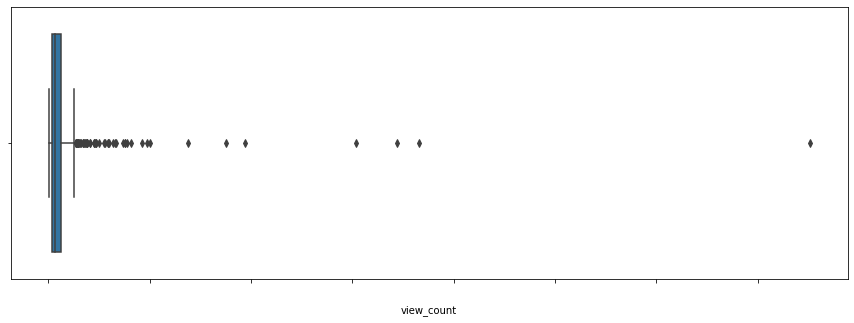

In [40]:
# 조회수 boxplot
plt.figure(figsize = (15, 5))
plt.xticks(color = "white", fontsize = 15)
plt.yticks(color = "white", fontsize = 15)
sns.boxplot(pre_df["view_count"])

In [41]:
# 4분 위수 1, 3분위 수 구하기
quatile_25 = np.percentile(pre_df["view_count"], 25)
quatile_75 = np.percentile(pre_df["view_count"], 75)

# iqr
iqr = quatile_75 - quatile_25
# 이상치 처리 기준
highest = quatile_75 + (1.5 * iqr)

In [45]:
outlier_rem_df = pre_df[pre_df["view_count"] > highest].reset_index(drop = True)

<AxesSubplot:>

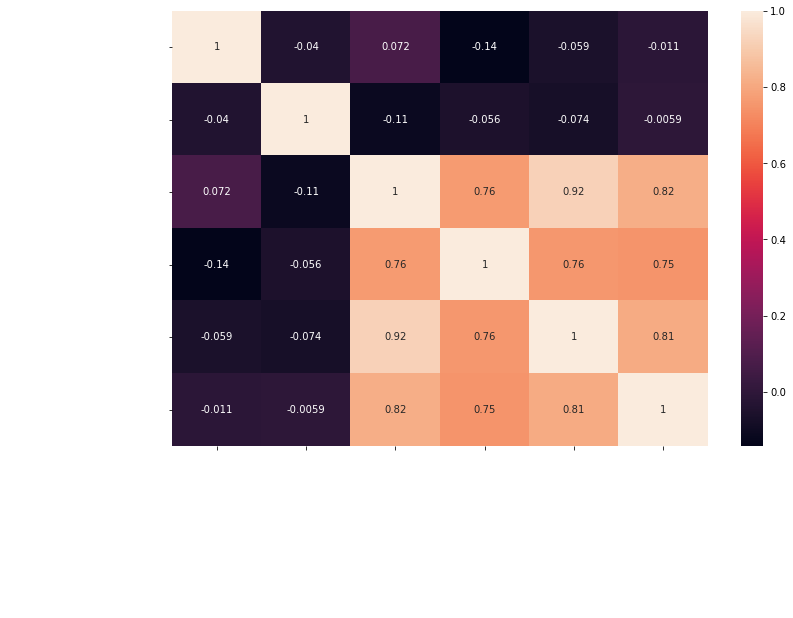

In [27]:
# 기존 df 상관분석
plt.figure(figsize = (12,8))
plt.xticks(color = "white", fontsize = 15)
plt.yticks(color = "white", fontsize = 15)
sns.heatmap(pre_df.corr(), annot = True)

<AxesSubplot:>

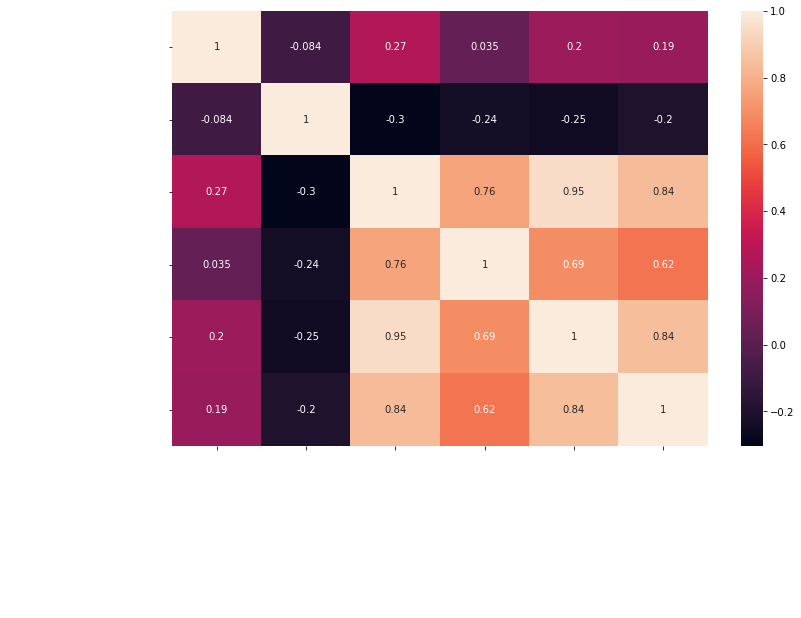

In [47]:
# 이상치 제거 상관분석
plt.figure(figsize = (12,8))
plt.xticks(color = "white", fontsize = 15)
plt.yticks(color = "white", fontsize = 15)
sns.heatmap(outlier_rem_df.corr(), annot = True)

## 상관분석 결과
- 업로드 횟수랑 조회수의 상관은 크지 않다(약0.2이하)

In [51]:
pre_df["month_upload_count"].value_counts()

13    78
14    70
17    68
18    54
19    38
15    30
26    26
5     25
12    24
8     24
23    23
11    22
7     21
20    20
3     18
16    16
4     16
6     12
9      9
1      4
Name: month_upload_count, dtype: int64